In [9]:
import cv2
import matplotlib.pyplot as plt
import os
import json
import numpy as np

In [29]:
def get_diffs(video_url: str):
  # diffs_path = os.path.join(os.getcwd(), "diffs", video_url.split("/")[-1].split(".")[0] + ".json")
  diffs_path = video_url
  if os.path.exists(diffs_path):
    with open(diffs_path) as f:
      return json.load(f)
  cap = cv2.VideoCapture(video_url)
  prev_frame = None
  diffs = []
  count = 0
  while True:
    ret, frame = cap.read()
    if not ret:
        break
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if prev_frame is not None:
      diff = cv2.absdiff(prev_frame, frame).sum()
      diffs.append(diff)
    count += 30
    cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    prev_frame = frame
    if cv2.waitKey(1) == ord('q'):
        break
  cap.release()
  diffs = diffs.tolist() if isinstance(diffs, np.ndarray) else diffs
  with open(diffs_path, "w") as f:
    json.dump(diffs, f)
  return diff

In [30]:
# diffs = get_diffs("videos/cs61a_lec1.mkv")

OpenCV: Couldn't read video stream from file "videos/cs61a_lec1.mkv"


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lawrencechen/fun/autochapter/autochapter/diffs/cs61a_lec1.json'

In [12]:

# median = np.median(diffs)
# mean = np.mean(diffs)
# jumps = [diff for diff in diffs if diff > .25e8]
# len(jumps)

In [13]:
# peaks = [diff for diff in diffs if diff >= .2e8]
# len(peaks)

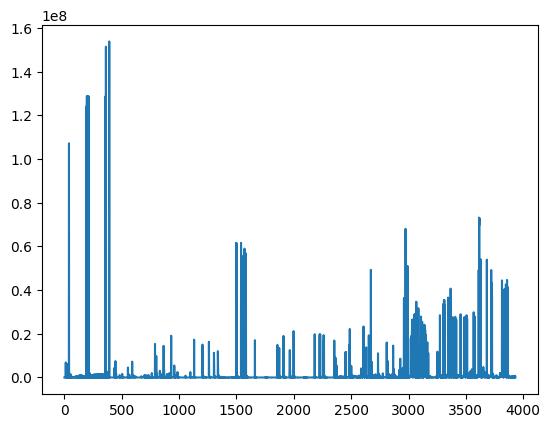

In [14]:
# plt.plot(diffs)

In [19]:
def get_timestamps(diffs, threshold=0.2e8, min_segment_length=20):
  last_i = -20
  timestamps = []
  # 1, 2, 3, 5, 8 -> 0, 1, 1, 2, 3
  diffs_2 = [float("inf")] # start with 0 because we always want to include 0
  for i in range(1, len(diffs)):
    diffs_2.append(diffs[i] - diffs[i - 1])
  
  for i, diff in enumerate(diffs_2):
    if diff >= threshold or i == 0 and i >= last_i + min_segment_length:
      last_i = i
      timestamps.append(i)
  return timestamps

# r = get_timestamps(diffs, threshold=0.3e8, min_segment_length=50)
# r, len(r)

([0,
  40,
  193,
  196,
  198,
  204,
  211,
  359,
  362,
  391,
  1498,
  1500,
  1540,
  1561,
  1570,
  1582,
  2672,
  2960,
  2974,
  2991,
  3068,
  3086,
  3306,
  3309,
  3312,
  3316,
  3346,
  3353,
  3367,
  3612,
  3615,
  3629,
  3683,
  3721,
  3725,
  3728,
  3815,
  3836,
  3849,
  3851,
  3859,
  3862],
 42)

In [16]:
# plt.scatter(range(len(diffs)), diffs)

In [17]:
# percentile_5 = np.percentile(diffs, 5)
# percentile_95 = np.percentile(diffs, 95)
# percentile_5, percentile_95
# np.where(np.array(diffs) < percentile_5)

# len()

# # plt.hist(range(len(diffs)), 30)